# Water Quality - Decision tree classifier

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [1]:
# importing libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:
#Reading Dataset
df = pd.read_csv('water_potability.csv')

In [8]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df=df.fillna(df.mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In this dataset column 'Potability' is the dependent variable. so our target column is 'Potability'. Indipendent variables are columns 'ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes' and 'Turbidity'.

In [17]:
# Assigning indipendant variables and dependant variales

x = df.drop(['Potability'],axis=1)
y = df['Potability']

In [19]:
# Finding best data split
data_split=[0.8,0.7,0.6,0.5,0.4,0.3,0.2]
for i in data_split:
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=i)
    sc = StandardScaler()
    scaler = sc.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    dec_clf = DecisionTreeClassifier()
    heart = dec_clf.fit(x_train_scaled,y_train)
    y_pred_test = dec_clf.predict(x_test_scaled)
    print('for train-test split of ',i,'test accuracy :',accuracy_score(y_test,y_pred_test))

for train-test split of  0.8 test accuracy : 0.5516978252575353
for train-test split of  0.7 test accuracy : 0.5632083696599826
for train-test split of  0.6 test accuracy : 0.5762970498474059
for train-test split of  0.5 test accuracy : 0.6007326007326007
for train-test split of  0.4 test accuracy : 0.5827612509534706
for train-test split of  0.3 test accuracy : 0.5879959308240081
for train-test split of  0.2 test accuracy : 0.5792682926829268


So best data split is either 0.2,0.3,0.4 . select test split as 0.5

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.5)

In [21]:
# Standadising values

sc = StandardScaler()
scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Now testing the model using different max_depth values

In [22]:
for i in range(2,20):
    dec_clf = DecisionTreeClassifier(max_depth=i)
    heart = dec_clf.fit(x_train_scaled,y_train)
    y_pred_test = dec_clf.predict(x_test_scaled)
    print('for max_depth value of ',i,'test accuracy :',accuracy_score(y_test,y_pred_test))

for max_depth value of  2 test accuracy : 0.6312576312576312
for max_depth value of  3 test accuracy : 0.6361416361416361
for max_depth value of  4 test accuracy : 0.6440781440781441
for max_depth value of  5 test accuracy : 0.6446886446886447
for max_depth value of  6 test accuracy : 0.6373626373626373
for max_depth value of  7 test accuracy : 0.6428571428571429
for max_depth value of  8 test accuracy : 0.6410256410256411
for max_depth value of  9 test accuracy : 0.6416361416361417
for max_depth value of  10 test accuracy : 0.6422466422466423
for max_depth value of  11 test accuracy : 0.6391941391941391
for max_depth value of  12 test accuracy : 0.6343101343101343
for max_depth value of  13 test accuracy : 0.6282051282051282
for max_depth value of  14 test accuracy : 0.5958485958485958
for max_depth value of  15 test accuracy : 0.6178266178266179
for max_depth value of  16 test accuracy : 0.6086691086691086
for max_depth value of  17 test accuracy : 0.6019536019536019
for max_depth va

Take max_depth as 5

In [23]:
# creating decision tree classifier

dec_clf = DecisionTreeClassifier(max_depth=5)

In [24]:
#training Decision tree classifier

heart = dec_clf.fit(x_train_scaled,y_train)

In [25]:
# Predicting the model for test and train data

y_pred_test = dec_clf.predict(x_test_scaled)

y_pred_train = dec_clf.predict(x_train_scaled)

In [26]:
# Finding accuracy of train and test data

print('test accuracy',accuracy_score(y_test,y_pred_test))
print('train accuracy',accuracy_score(y_train,y_pred_train))

test accuracy 0.6440781440781441
train accuracy 0.7008547008547008


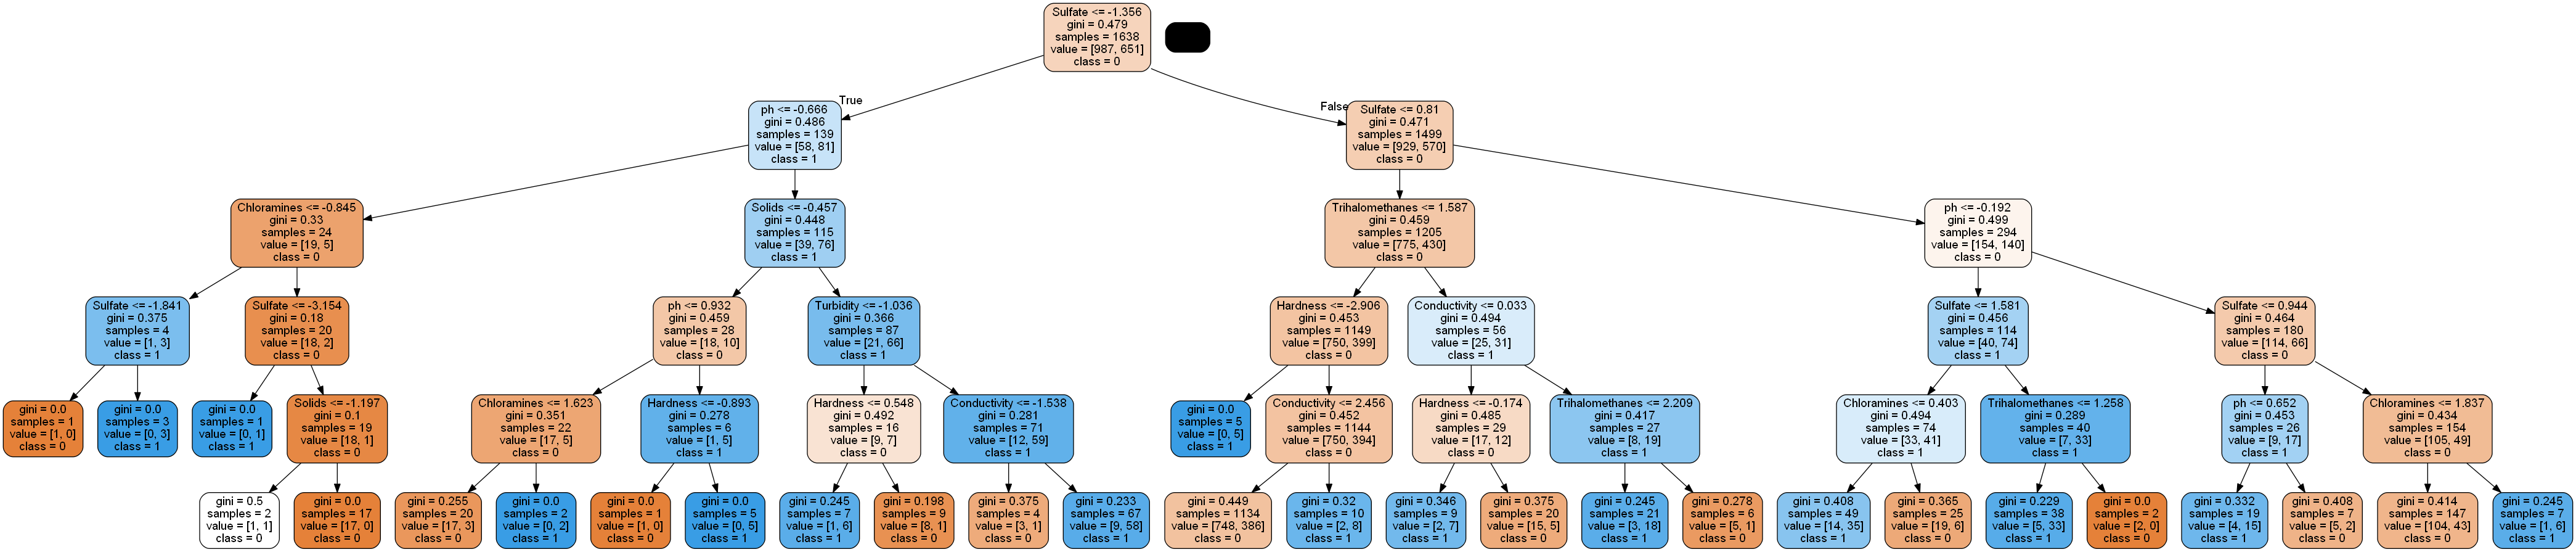

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

dot_data = StringIO()

export_graphviz(dec_clf, out_file=dot_data,
               filled=True, rounded=True,
               feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())